In [33]:
import pandas as pd

# Đọc dữ liệu từ tập tin CSV với các tùy chọn
df = pd.read_csv('NKE.csv', header=0, parse_dates=[0], index_col=0)

# In ra 5 dòng đầu tiên của DataFrame
print(df.head())


                 Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2018-12-31  73.980003  74.459999  73.519997  74.139999  70.450752  5519100
2019-01-02  72.790001  74.639999  72.190002  74.059998  70.374756  6762700
2019-01-03  73.250000  73.320000  71.209999  72.750000  69.129959  8007400
2019-01-04  73.449997  75.120003  73.120003  74.650002  70.935394  7844200
2019-01-07  74.739998  76.360001  74.300003  75.720001  71.952156  8184800


In [34]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [35]:
# 2.  chia train test theo tỉ lệ 7-3
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index
# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.3 * len(df))
#val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
#val_data = df[train_size+test_size:]


In [36]:
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])


from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)


model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.85 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3954.902, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3956.898, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3956.898, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3953.080, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3958.900, Time=0.10 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.107 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [37]:
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(n_periods=len(y_test))

#x_val= np.array(val_data.index).reshape(-1, 1)
#y_val = np.array(val_data['Close'])
#y_pred_val =  model.predict(n_periods=len(y_val))

In [38]:
#Dự đoán 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)


x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)


y_next_30_days = model.predict(n_periods=len(x_next_30_days))

print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[102.779999 102.779999 102.779999 102.779999 102.779999 102.779999
 102.779999 102.779999 102.779999 102.779999 102.779999 102.779999
 102.779999 102.779999 102.779999 102.779999 102.779999 102.779999
 102.779999 102.779999 102.779999 102.779999 102.779999 102.779999
 102.779999 102.779999 102.779999 102.779999 102.779999 102.779999]


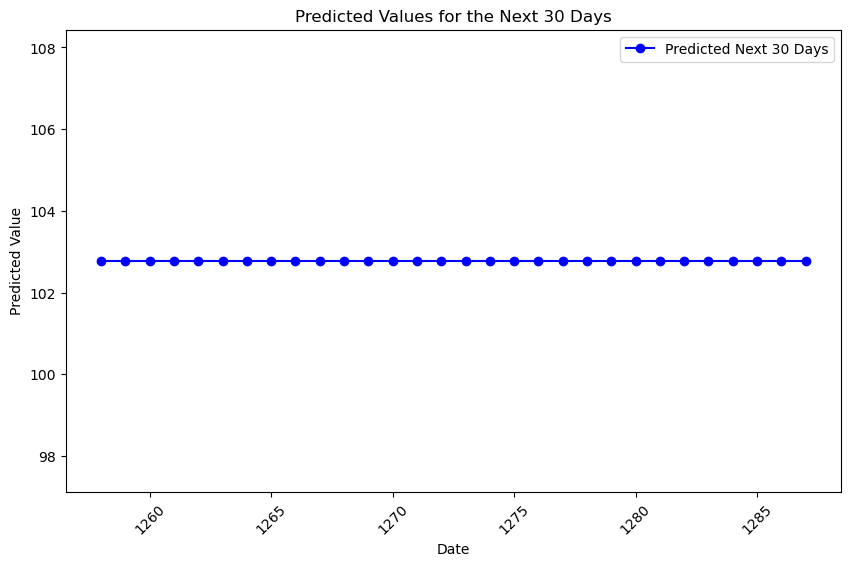

In [39]:
# Vẽ biểu đồ
plt.figure(figsize=(10, 6)) # Set the figure size
plt.plot(x_next_30_days, y_next_30_days, marker='o', color='b', label='Predicted Next 30 Days')

# Đặt tiêu đề và nhãn
plt.title('Predicted Values for the Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Predicted Value')
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.legend()

# Hiển thị biểu đồ
plt.show()

In [40]:
# 8. Tính RMSE
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error, mean_squared_error, r2_score
#valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
#print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
# 8+. Tính MAPE 
#valid_mape = mean_absolute_percentage_error(y_val,y_pred_val)
test_mape = mean_absolute_percentage_error(y_test,y_pred)
#print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)
# 8+. Tính MAE
#valid_mae = mean_absolute_error(y_val,y_pred_val)
test_mae = mean_absolute_error(y_test,y_pred)
#print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)
# MSE
#valid_mse = mean_squared_error(y_val, y_pred_val)
test_mse = mean_squared_error(y_test, y_pred)
#print('Validation MSE:', valid_mse)
print('Testing MSE:', test_mse)

Testing RMSE: 12.681405675229412
Testing MAPE: 0.09164393000747634
Testing MAE: 10.37297143766578
Testing MSE: 160.8180498997407


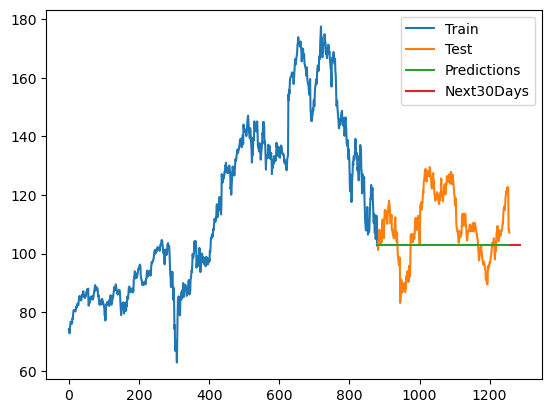

In [41]:
# 9.Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
#plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Days'])
plt.show()

In [42]:
#train-test (8-2)

In [43]:
# 2.  chia train test theo tỉ lệ 8-2
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index
# Split the data into training, testing, and validation sets
train_size = int(0.8 * len(df))
test_size = int(0.2 * len(df))
#val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
#val_data = df[train_size+test_size:]

In [44]:
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])


from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)


model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.05 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4582.199, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4584.198, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4584.198, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4580.535, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4586.198, Time=0.11 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.337 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [45]:
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(n_periods=len(y_test))

#x_val= np.array(val_data.index).reshape(-1, 1)
#y_val = np.array(val_data['Close'])
#y_pred_val =  model.predict(n_periods=len(y_val))

In [46]:
#Dự đoán 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)


x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)


y_next_30_days = model.predict(n_periods=len(x_next_30_days))

print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[117.559998 117.559998 117.559998 117.559998 117.559998 117.559998
 117.559998 117.559998 117.559998 117.559998 117.559998 117.559998
 117.559998 117.559998 117.559998 117.559998 117.559998 117.559998
 117.559998 117.559998 117.559998 117.559998 117.559998 117.559998
 117.559998 117.559998 117.559998 117.559998 117.559998 117.559998]


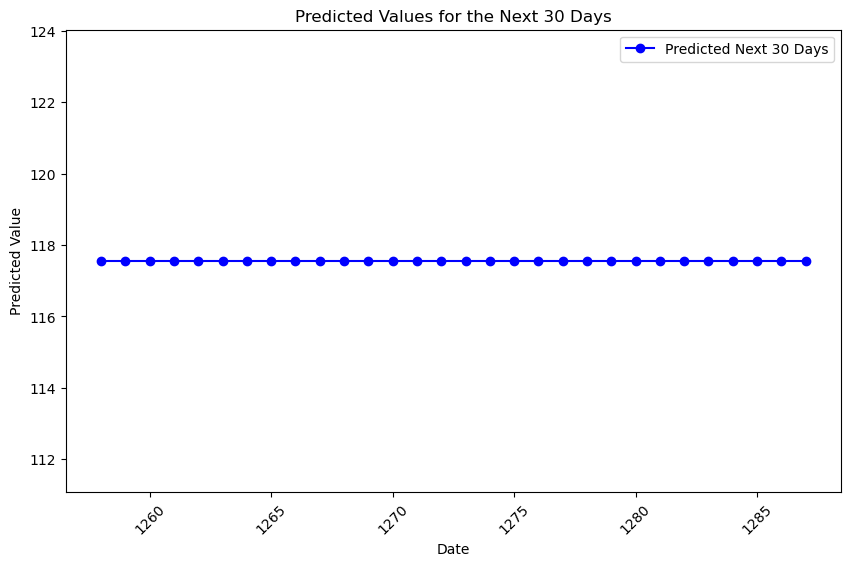

In [47]:
# Vẽ biểu đồ
plt.figure(figsize=(10, 6)) # Set the figure size
plt.plot(x_next_30_days, y_next_30_days, marker='o', color='b', label='Predicted Next 30 Days')

# Đặt tiêu đề và nhãn
plt.title('Predicted Values for the Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Predicted Value')
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.legend()

# Hiển thị biểu đồ
plt.show()

In [48]:
# 8. Tính RMSE
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error, mean_squared_error, r2_score
#valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
#print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
# 8+. Tính MAPE 
#valid_mape = mean_absolute_percentage_error(y_val,y_pred_val)
test_mape = mean_absolute_percentage_error(y_test,y_pred)
#print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)
# 8+. Tính MAE
#valid_mae = mean_absolute_error(y_val,y_pred_val)
test_mae = mean_absolute_error(y_test,y_pred)
#print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)
# MSE
#valid_mse = mean_squared_error(y_val, y_pred_val)
test_mse = mean_squared_error(y_test, y_pred)
#print('Validation MSE:', valid_mse)
print('Testing MSE:', test_mse)

Testing RMSE: 11.38914637200161
Testing MAPE: 0.08980969326924998
Testing MAE: 9.563505605577687
Testing MSE: 129.71265508287743


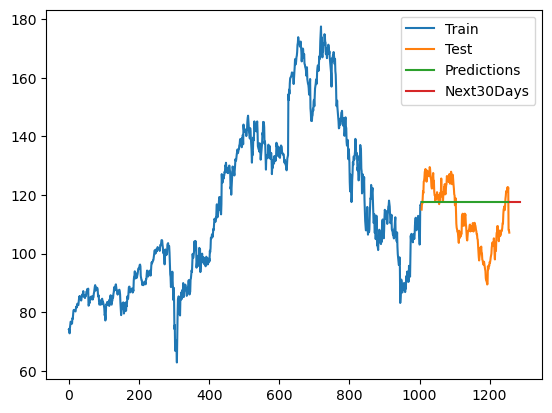

In [49]:
# 9.Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
#plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Days'])
plt.show()

In [50]:
#train-test (9-1)

In [51]:
# 2.  chia train test theo tỉ lệ 9-1
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index
# Split the data into training, testing, and validation sets
train_size = int(0.9 * len(df))
test_size = int(0.1 * len(df))
#val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
#val_data = df[train_size+test_size:]

In [52]:
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])


from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)


model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5116.147, Time=0.53 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5110.062, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5112.002, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5112.003, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5108.316, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5114.003, Time=0.13 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.850 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [53]:
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(n_periods=len(y_test))

#x_val= np.array(val_data.index).reshape(-1, 1)
#y_val = np.array(val_data['Close'])
#y_pred_val =  model.predict(n_periods=len(y_val))

In [54]:
#Dự đoán 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)


x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)


y_next_30_days = model.predict(n_periods=len(x_next_30_days))

print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[113.370003 113.370003 113.370003 113.370003 113.370003 113.370003
 113.370003 113.370003 113.370003 113.370003 113.370003 113.370003
 113.370003 113.370003 113.370003 113.370003 113.370003 113.370003
 113.370003 113.370003 113.370003 113.370003 113.370003 113.370003
 113.370003 113.370003 113.370003 113.370003 113.370003 113.370003]


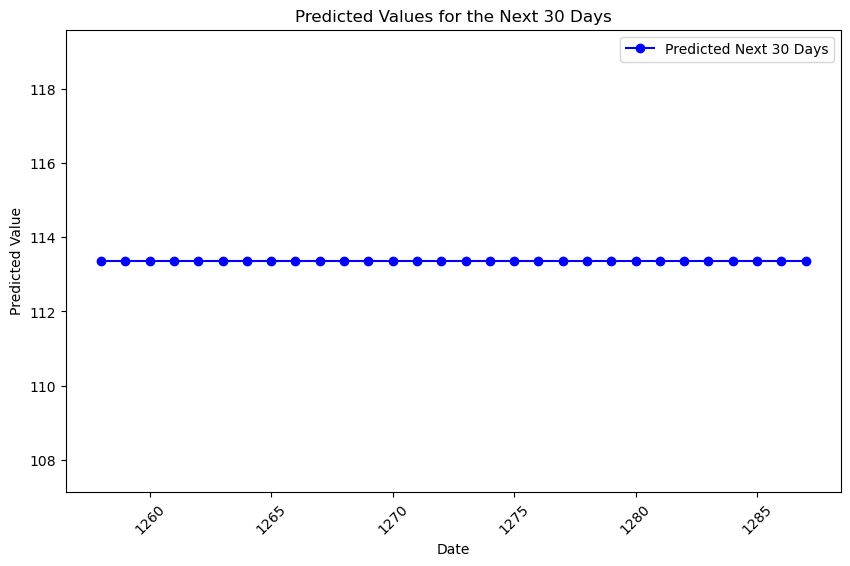

In [55]:
# Vẽ biểu đồ
plt.figure(figsize=(10, 6)) # Set the figure size
plt.plot(x_next_30_days, y_next_30_days, marker='o', color='b', label='Predicted Next 30 Days')

# Đặt tiêu đề và nhãn
plt.title('Predicted Values for the Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Predicted Value')
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.legend()

# Hiển thị biểu đồ
plt.show()

In [56]:
# 8. Tính RMSE
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error, mean_squared_error, r2_score
#valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
#print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
# 8+. Tính MAPE 
#valid_mape = mean_absolute_percentage_error(y_val,y_pred_val)
test_mape = mean_absolute_percentage_error(y_test,y_pred)
#print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)
# 8+. Tính MAE
#valid_mae = mean_absolute_error(y_val,y_pred_val)
test_mae = mean_absolute_error(y_test,y_pred)
#print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)
# MSE
#valid_mse = mean_squared_error(y_val, y_pred_val)
test_mse = mean_squared_error(y_test, y_pred)
#print('Validation MSE:', valid_mse)
print('Testing MSE:', test_mse)

Testing RMSE: 11.041019986643223
Testing MAPE: 0.09415704645466172
Testing MAE: 9.506082607999996
Testing MSE: 121.90412234545512


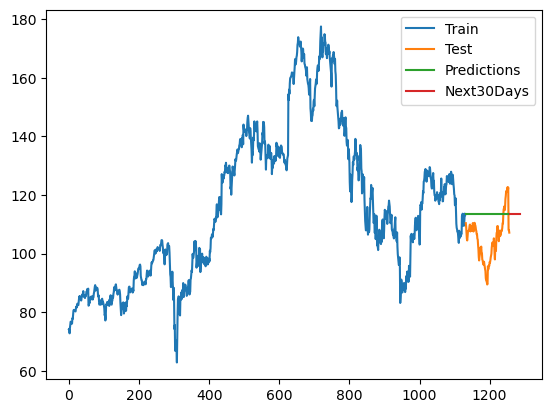

In [57]:
# 9.Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
#plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Days'])
plt.show()